# Détection des fraudes aux paiements en ligne à l’aide de l’apprentissage automatique en Python

*Description des variables:*

***1-step: indique l’unité de temps***

***2-type: le type de transaction effectuée***

***3-amount: le montant total de la transaction***

***4-nameOrig: compte qui commence l’opération***

***5-oldbalanceOrg: Solde du compte de l’expéditeur avant la transaction***

***6-newbalanceOrig: Solde du compte de l’expéditeur après transaction***

***7-nameDest: compte qui reçoit l’opération***

***8-oldbalanceDest: Solde du compte du destinataire avant transaction***

***9-newbalanceDest: Solde du compte du destinataire après transaction***

***10-isFraud: La valeur à prédire, c’est-à-dire 0 ou 1***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as sns
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

1-Visualisation des données

In [ ]:
# Importe les données via: https://drive.google.com/file/d/127JqP3WGjBVihR-ZcUR86T3wwy3_g63v/view
fraude=pd.read_csv('new_data.csv')
fraude.head(5)# visualiser la table

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraude.isnull().sum()# les données manquantes

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
fraude['isFraud'].value_counts()# Nombre de Classe 0 et 1

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
fraude.info()# infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
fraude.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
# les variables de type categoriel
fraude_obj=[col for col in fraude.columns if fraude[col].dtype=='object']
print(f'les variables de type categoriel= {fraude_obj}')

# les varaiable de type int
fraude_int=[col for col in fraude.columns if fraude[col].dtype=='int64']
print(f'les varaiable de type int= {fraude_int}')

# les variable de type float
fraude_float=[col for col in fraude.columns if fraude[col].dtype=='float']
print(f'les variable de type float= {fraude_float}')

les variables de type categoriel= ['type', 'nameOrig', 'nameDest']
les varaiable de type int= ['step', 'isFraud', 'isFlaggedFraud']
les variable de type float= ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [9]:
fraude.describe() #description de la moyenne, nombre elements et autres dans chaque variable numerique

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

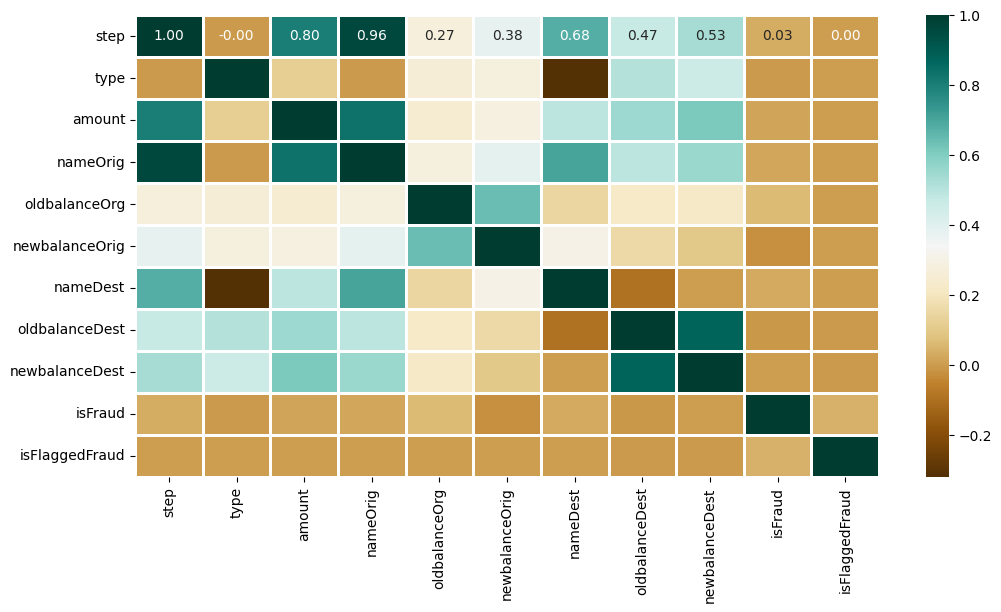

In [10]:
# Correlation entre les variables numeriques
plt.figure(figsize=(12, 6))
sns.heatmap(fraude.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


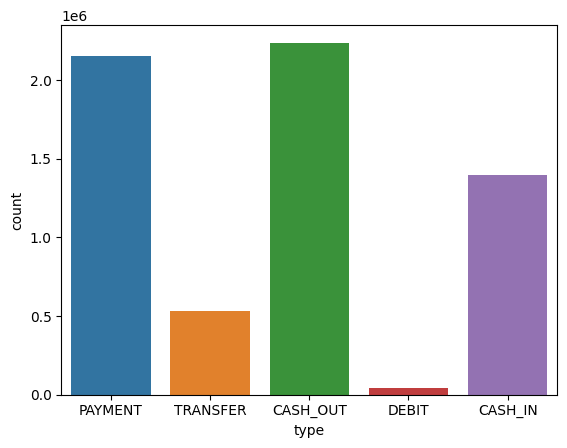

In [11]:
#Graphe sur les types de Paiement
sns.countplot(x='type',data=fraude)
plt.show()

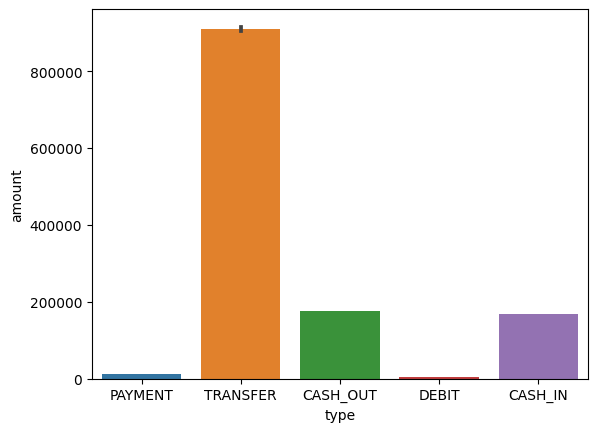

In [12]:
# Analysons les colonnes de type et les montants envoiés
sns.barplot(x='type',y='amount',data=fraude)
plt.show()

c:\Users\wilfr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x300 with 0 Axes>

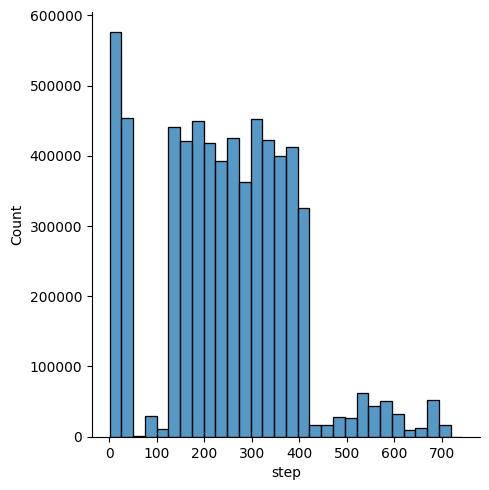

In [13]:
# Voyons la distribution du colonne step
plt.figure(figsize=(5,3))
sns.displot(x=fraude['step'],bins=30,data=fraude)
plt.show()

**La grande distribution des valeurs dans les données se situe entre 150 et 400**

# Prétraitement des données

Cette étape comprend les éléments suivants :

***a-Encodage de la colonne Type***

***b-Suppression de colonnes non pertinentes comme nameOrig, nameDest***

***c-Fractionnement des données***

In [14]:
# Encodage du colonne type
type_new=pd.get_dummies(fraude['type'],drop_first=True)
fraude_new=pd.concat([fraude,type_new],axis=1)
fraude_new.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [15]:
# Sppression des colonnes : nameOrig,nameDest,isFraud
X=fraude_new.drop(['nameOrig','type','nameDest','isFraud'],axis=1)
y=fraude_new['isFraud']


In [16]:
#verification du shape

print('X.shape: ',X.shape,'\n','y.shape:',y.shape)

X.shape:  (6362620, 11) 
 y.shape: (6362620,)


In [17]:
# Fractionnement des données
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Formation de modèle
Comme la prédiction est un problème de classification, les modèles que nous utiliserons sont les suivants :


- LogisticRegression : Il prédit que la probabilité d’une donnée donnée appartient ou non à la catégorie particulière.**


- XGBClassifier : Il fait référence aux arbres de décision Gradient Boosted. Dans cet algorithme, des arbres de décision sont créés sous forme séquentielle et des poids sont attribués à toutes les variables indépendantes qui sont ensuite introduites dans l’arbre de décision qui prédit les résultats.***

- SVC : SVC est utilisé pour trouver un hyperplan dans un espace à N dimensions qui classe distinctement les points de données. Ensuite, il donne la sortie en fonction de l’élément le plus proche.***

- RandomForestClassifier : le classificateur de forêt aléatoire crée un ensemble d’arbres de décision à partir d’un sous-ensemble sélectionné au hasard de l’ensemble d’apprentissage. Ensuite, il recueille les votes de différents arbres de décision pour décider de la prédiction finale.***

In [18]:
#!pip install xgboost

In [19]:
# Importons les modules clés
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [20]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
    
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()


c:\Users\wilfr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9882542364093866
Validation Accuracy :  0.9902414339578095

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.7050989201806686
Validation Accuracy :  0.7089518198886019

RandomForestClassifier(criterion='entropy', n_

# Évaluation du modèle

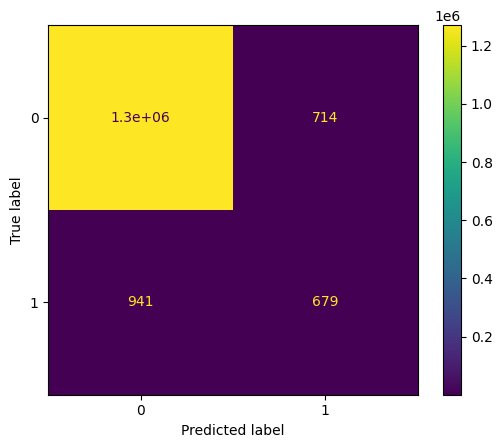

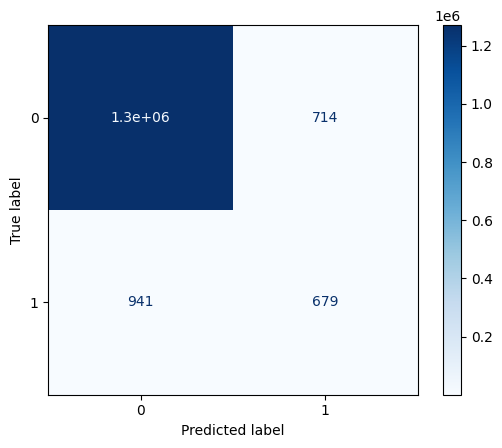

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test) 

cm.plot(cmap='Blues') 

plt.show()
